# Análise exploratória de dados

## Exercício 1 - curso SIRCA

In [2]:
# prompt: Generate a new simulated dataset of IoT sensor data for soil parameters. Include temperature at several depths, moisture at several depths, water content at several depths, nitrogen, phosphorous, potassium, pH and EC.Include in the simulated data trends, variations and relationships between parameters that are normally observed in soil. The new dataset should be a dataframe named soil_simulated.

import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of data points (e.g., time steps or locations)
n_points = 1000

# Define parameters
time = np.arange(n_points)
# Simulate a base temperature trend (e.g., seasonal)
base_temp = 15 + 10 * np.sin(2 * np.pi * time / 365)

# Simulate data for different parameters

# Temperature at different depths (temperature decreases with depth)
temp_surf = base_temp + np.random.normal(0, 2, n_points) # Surface temperature
temp_10cm = base_temp * 0.95 + np.random.normal(0, 1.5, n_points) # Temperature at 10cm
temp_50cm = base_temp * 0.9 + np.random.normal(0, 1, n_points) # Temperature at 50cm

# Moisture and Water Content (related, moisture tends to increase with depth)
moisture_surf = 0.3 + 0.1 * np.random.normal(0, 1, n_points) + 0.05 * np.sin(2 * np.pi * time / 30) # Diurnal variation
moisture_10cm = 0.4 + 0.1 * np.random.normal(0, 0.8, n_points) + 0.03 * np.sin(2 * np.pi * time / 30)
moisture_50cm = 0.5 + 0.1 * np.random.normal(0, 0.5, n_points)
# Simple relationship between moisture and water content
water_content_surf = moisture_surf * 0.4 + np.random.normal(0, 0.02, n_points)
water_content_10cm = moisture_10cm * 0.4 + np.random.normal(0, 0.02, n_points)
water_content_50cm = moisture_50cm * 0.4 + np.random.normal(0, 0.02, n_points)

# Nutrients (Nitrogen, Phosphorous, Potassium) - can have variations based on season or fertilization events
nitrogen = 50 + 20 * np.random.normal(0, 1, n_points)
phosphorous = 30 + 15 * np.random.normal(0, 1, n_points)
potassium = 100 + 40 * np.random.normal(0, 1, n_points)

# pH (tend to be relatively stable but can vary with moisture and biological activity)
ph = 6.5 + 0.5 * np.random.normal(0, 1, n_points) - 0.1 * moisture_surf # Slight inverse relationship with moisture

# Electrical Conductivity (EC) - increases with nutrient concentration and salinity
ec = 0.5 + 0.1 * (nitrogen/100 + phosphorous/100 + potassium/200) + 0.05 * np.random.normal(0, 1, n_points)

# Create a dictionary for the DataFrame
data = {
    'Time': time,
    'Temperature_Surface': temp_surf,
    'Temperature_10cm': temp_10cm,
    'Temperature_50cm': temp_50cm,
    'Moisture_Surface': moisture_surf,
    'Moisture_10cm': moisture_10cm,
    'Moisture_50cm': moisture_50cm,
    'Water_Content_Surface': water_content_surf,
    'Water_Content_10cm': water_content_10cm,
    'Water_Content_50cm': water_content_50cm,
    'Nitrogen': nitrogen,
    'Phosphorous': phosphorous,
    'Potassium': potassium,
    'pH': ph,
    'EC': ec
}

# Create the DataFrame
soil_simulated = pd.DataFrame(data)

# Ensure values are within reasonable bounds (e.g., moisture/water content between 0 and 1, pH between 0 and 14)
soil_simulated['Moisture_Surface'] = np.clip(soil_simulated['Moisture_Surface'], 0, 1)
soil_simulated['Moisture_10cm'] = np.clip(soil_simulated['Moisture_10cm'], 0, 1)
soil_simulated['Moisture_50cm'] = np.clip(soil_simulated['Moisture_50cm'], 0, 1)
soil_simulated['Water_Content_Surface'] = np.clip(soil_simulated['Water_Content_Surface'], 0, 0.6) # Water content is typically a subset of volume
soil_simulated['Water_Content_10cm'] = np.clip(soil_simulated['Water_Content_10cm'], 0, 0.6)
soil_simulated['Water_Content_50cm'] = np.clip(soil_simulated['Water_Content_50cm'], 0, 0.6)
soil_simulated['pH'] = np.clip(soil_simulated['pH'], 3, 9) # Typical soil pH range
soil_simulated['EC'] = np.clip(soil_simulated['EC'], 0, 5) # Typical EC range

# Display the first few rows and info of the simulated data
print(soil_simulated.head())
print(soil_simulated.info())

   Time  Temperature_Surface  Temperature_10cm  Temperature_50cm  \
0     0            15.993428         16.349033         12.824822   
1     1            14.895605         15.800477         13.510402   
2     2            16.639593         14.666451         13.017375   
3     3            18.562256         13.769982         13.656615   
4     4            15.219718         15.950958         12.225607   

   Moisture_Surface  Moisture_10cm  Moisture_50cm  Water_Content_Surface  \
0          0.109219       0.330921       0.478812               0.021406   
1          0.224357       0.403741       0.477329               0.077124   
2          0.278976       0.413643       0.410218               0.092749   
3          0.518158       0.455444       0.483495               0.196303   
4          0.392813       0.312946       0.536641               0.152842   

   Water_Content_10cm  Water_Content_50cm   Nitrogen  Phosphorous   Potassium  \
0            0.148072            0.190864  65.308043 

In [3]:
# prompt: Create a copy of the soil_simulated dataframe and in the copy simulate missing data at rates between 5 and 15 percent.

import numpy as np
# Create a copy of the dataframe
soil_simulated_missing = soil_simulated.copy()

# Simulate missing data
for col in soil_simulated_missing.columns:
    # Determine a random missing percentage between 5% and 15%
    missing_rate = np.random.uniform(0.05, 0.15)

    # Calculate the number of values to make missing
    n_missing = int(len(soil_simulated_missing) * missing_rate)

    # Randomly select indices to set to NaN
    missing_indices = np.random.choice(soil_simulated_missing.index, n_missing, replace=False)

    # Set the selected values to NaN
    soil_simulated_missing.loc[missing_indices, col] = np.nan

# Display the info of the dataframe with missing data to verify
print("\nDataFrame with simulated missing data:")
print(soil_simulated_missing.info())

# Display the count of missing values per column
print("\nMissing values per column:")
print(soil_simulated_missing.isnull().sum())


DataFrame with simulated missing data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time                   934 non-null    float64
 1   Temperature_Surface    893 non-null    float64
 2   Temperature_10cm       932 non-null    float64
 3   Temperature_50cm       944 non-null    float64
 4   Moisture_Surface       910 non-null    float64
 5   Moisture_10cm          944 non-null    float64
 6   Moisture_50cm          914 non-null    float64
 7   Water_Content_Surface  854 non-null    float64
 8   Water_Content_10cm     936 non-null    float64
 9   Water_Content_50cm     916 non-null    float64
 10  Nitrogen               862 non-null    float64
 11  Phosphorous            883 non-null    float64
 12  Potassium              918 non-null    float64
 13  pH                     881 non-null    float64
 14  EC               

In [4]:
# prompt: Calculate summary statistics for the two dataframes, and compare them.

import pandas as pd
# Calculate summary statistics for the original dataframe
summary_original = soil_simulated.describe()

# Calculate summary statistics for the dataframe with missing data
summary_missing = soil_simulated_missing.describe()

print("\nSummary Statistics for Original DataFrame:")
print(summary_original)

print("\nSummary Statistics for DataFrame with Missing Data:")
print(summary_missing)

# Compare the summary statistics
print("\nComparison of Summary Statistics:")
# We can compare specific statistics or just display both side-by-side
# For example, comparing the mean and standard deviation for a few columns
comparison_columns = ['Temperature_Surface', 'Moisture_Surface', 'pH']

print("\nComparison of Mean:")
print(pd.DataFrame({
    'Original_Mean': summary_original.loc['mean', comparison_columns],
    'Missing_Mean': summary_missing.loc['mean', comparison_columns]
}))

print("\nComparison of Standard Deviation:")
print(pd.DataFrame({
    'Original_Std': summary_original.loc['std', comparison_columns],
    'Missing_Std': summary_missing.loc['std', comparison_columns]
}))

# We can also compare the count, which will show the impact of missing data
print("\nComparison of Count (Non-missing values):")
print(pd.DataFrame({
    'Original_Count': summary_original.loc['count', comparison_columns],
    'Missing_Count': summary_missing.loc['count', comparison_columns]
}))


Summary Statistics for Original DataFrame:
              Time  Temperature_Surface  Temperature_10cm  Temperature_50cm  \
count  1000.000000          1000.000000       1000.000000       1000.000000   
mean    499.500000            15.662028         14.948450         14.066862   
std     288.819436             7.297908          6.855993          6.365079   
min       0.000000            -1.278672          1.809551          2.224551   
25%     249.750000             8.974473          8.373400          7.888949   
50%     499.500000            16.151658         15.554195         14.736383   
75%     749.250000            22.152025         21.427844         20.220713   
max     999.000000            30.465001         27.637661         24.651738   

       Moisture_Surface  Moisture_10cm  Moisture_50cm  Water_Content_Surface  \
count       1000.000000    1000.000000    1000.000000            1000.000000   
mean           0.298467       0.396259       0.497663               0.118881   
std 

Q. Copiar o código da célula anterior, adaptando, para comparar todas as colunas entre as tabelas com e sem missing data.

In [5]:
colunas = soil_simulated.columns.values.tolist()

In [6]:
# prompt: Calculate summary statistics for the two dataframes, and compare them.

import pandas as pd
# Calculate summary statistics for the original dataframe
summary_original = soil_simulated.describe()

# Calculate summary statistics for the dataframe with missing data
summary_missing = soil_simulated_missing.describe()

print("\nSummary Statistics for Original DataFrame:")
print(summary_original)

print("\nSummary Statistics for DataFrame with Missing Data:")
print(summary_missing)

# Compare the summary statistics
print("\nComparison of Summary Statistics:")
# We can compare specific statistics or just display both side-by-side
# For example, comparing the mean and standard deviation for a few columns
comparison_columns = ['Temperature_Surface', 'Moisture_Surface', 'pH']

print("\nComparison of Mean:")
print(pd.DataFrame({
    'Original_Mean': summary_original.loc['mean', colunas],
    'Missing_Mean': summary_missing.loc['mean', colunas]
}))

print("\nComparison of Standard Deviation:")
print(pd.DataFrame({
    'Original_Std': summary_original.loc['std', colunas],
    'Missing_Std': summary_missing.loc['std', colunas]
}))

# We can also compare the count, which will show the impact of missing data
print("\nComparison of Count (Non-missing values):")
print(pd.DataFrame({
    'Original_Count': summary_original.loc['count', colunas],
    'Missing_Count': summary_missing.loc['count', colunas]
}))


Summary Statistics for Original DataFrame:
              Time  Temperature_Surface  Temperature_10cm  Temperature_50cm  \
count  1000.000000          1000.000000       1000.000000       1000.000000   
mean    499.500000            15.662028         14.948450         14.066862   
std     288.819436             7.297908          6.855993          6.365079   
min       0.000000            -1.278672          1.809551          2.224551   
25%     249.750000             8.974473          8.373400          7.888949   
50%     499.500000            16.151658         15.554195         14.736383   
75%     749.250000            22.152025         21.427844         20.220713   
max     999.000000            30.465001         27.637661         24.651738   

       Moisture_Surface  Moisture_10cm  Moisture_50cm  Water_Content_Surface  \
count       1000.000000    1000.000000    1000.000000            1000.000000   
mean           0.298467       0.396259       0.497663               0.118881   
std 

<ipython-input-7-9230df5e4fe6>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  soil_simulated_fillna_mean[col].fillna(mean_value, inplace=True)
<ipython-input-7-9230df5e4fe6>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=


DataFrame filled with Mean Imputation:
Time                     0
Temperature_Surface      0
Temperature_10cm         0
Temperature_50cm         0
Moisture_Surface         0
Moisture_10cm            0
Moisture_50cm            0
Water_Content_Surface    0
Water_Content_10cm       0
Water_Content_50cm       0
Nitrogen                 0
Phosphorous              0
Potassium                0
pH                       0
EC                       0
dtype: int64

DataFrame filled with Median Imputation:
Time                     0
Temperature_Surface      0
Temperature_10cm         0
Temperature_50cm         0
Moisture_Surface         0
Moisture_10cm            0
Moisture_50cm            0
Water_Content_Surface    0
Water_Content_10cm       0
Water_Content_50cm       0
Nitrogen                 0
Phosphorous              0
Potassium                0
pH                       0
EC                       0
dtype: int64

DataFrame filled with Forward Fill (and Backfill for leading NaNs):
Time         

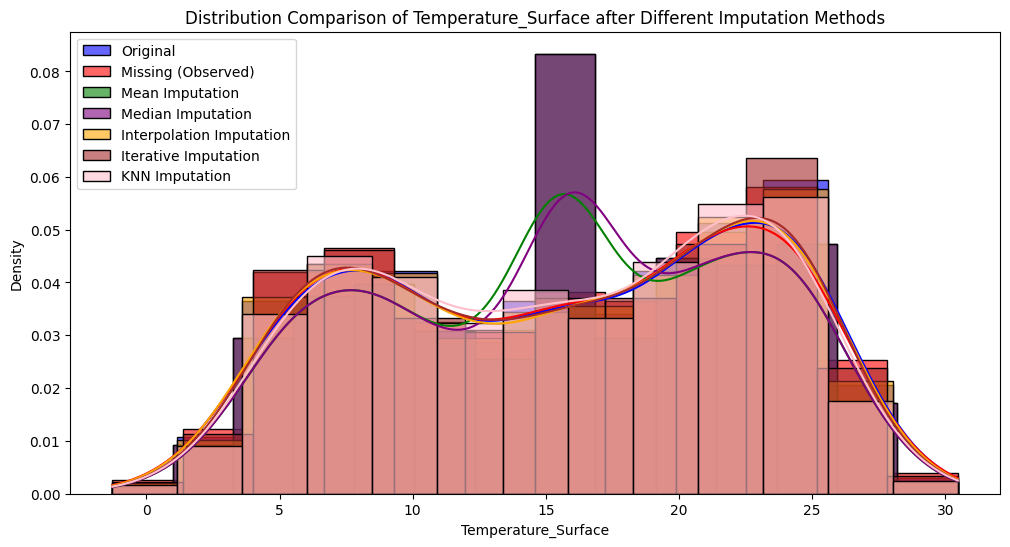


Summary Statistics after Mean Imputation:
              Time  Temperature_Surface  Temperature_10cm  Temperature_50cm  \
count  1000.000000          1000.000000       1000.000000       1000.000000   
mean    504.004283            15.575604         15.053096         14.061953   
std     279.408051             6.873187          6.591498          6.168656   
min       0.000000            -1.278672          1.846135          2.224551   
25%     272.500000             9.494483          8.862335          8.282726   
50%     504.004283            15.575604         15.053096         14.061953   
75%     737.250000            21.384766         21.107233         19.826417   
max     999.000000            30.465001         27.637661         24.651738   

       Moisture_Surface  Moisture_10cm  Moisture_50cm  Water_Content_Surface  \
count       1000.000000    1000.000000    1000.000000            1000.000000   
mean           0.298090       0.395431       0.497903               0.118680   
std  

In [7]:
# prompt: To a copy of the dataframe soil_simulated_missing, apply different methods to fill in missing data, from simple to more complex methods.

import pandas as pd
# Make a copy to work with for each method
soil_simulated_fillna_mean = soil_simulated_missing.copy()

# Simple Imputation: Fill missing values with the mean of each column
# The mean is sensitive to outliers, but it's a simple approach.
for col in soil_simulated_fillna_mean.columns:
    if soil_simulated_fillna_mean[col].isnull().any(): # Check if there are any missing values
        mean_value = soil_simulated_fillna_mean[col].mean()
        soil_simulated_fillna_mean[col].fillna(mean_value, inplace=True)

print("\nDataFrame filled with Mean Imputation:")
print(soil_simulated_fillna_mean.isnull().sum()) # Verify no missing values remain

# Make a copy for the next method
soil_simulated_fillna_median = soil_simulated_missing.copy()

# Simple Imputation: Fill missing values with the median of each column
# The median is more robust to outliers than the mean.
for col in soil_simulated_fillna_median.columns:
    if soil_simulated_fillna_median[col].isnull().any():
        median_value = soil_simulated_fillna_median[col].median()
        soil_simulated_fillna_median[col].fillna(median_value, inplace=True)

print("\nDataFrame filled with Median Imputation:")
print(soil_simulated_fillna_median.isnull().sum())

# Make a copy for the next method
soil_simulated_fillna_ffill = soil_simulated_missing.copy()

# Imputation using Forward Fill (ffill)
# Fills missing values with the previous valid observation.
# This is suitable for time-series data where the previous value is likely related.
for col in soil_simulated_fillna_ffill.columns:
    if soil_simulated_fillna_ffill[col].isnull().any():
        soil_simulated_fillna_ffill[col].fillna(method='ffill', inplace=True)

# After ffill, there might still be NaNs at the beginning of the series if the first value is missing.
# We can use backfill (bfill) for any remaining NaNs at the start.
for col in soil_simulated_fillna_ffill.columns:
     if soil_simulated_fillna_ffill[col].isnull().any():
        soil_simulated_fillna_ffill[col].fillna(method='bfill', inplace=True)

print("\nDataFrame filled with Forward Fill (and Backfill for leading NaNs):")
print(soil_simulated_fillna_ffill.isnull().sum())

# Make a copy for the next method
soil_simulated_fillna_bfill = soil_simulated_missing.copy()

# Imputation using Backward Fill (bfill)
# Fills missing values with the next valid observation.
# Also suitable for time-series data.
for col in soil_simulated_fillna_bfill.columns:
    if soil_simulated_fillna_bfill[col].isnull().any():
        soil_simulated_fillna_bfill[col].fillna(method='bfill', inplace=True)

# After bfill, there might still be NaNs at the end of the series if the last value is missing.
# We can use forward fill (ffill) for any remaining NaNs at the end.
for col in soil_simulated_fillna_bfill.columns:
     if soil_simulated_fillna_bfill[col].isnull().any():
        soil_simulated_fillna_bfill[col].fillna(method='ffill', inplace=True)

print("\nDataFrame filled with Backward Fill (and Forward Fill for trailing NaNs):")
print(soil_simulated_fillna_bfill.isnull().sum())

# Make a copy for the next method
soil_simulated_fillna_interpolation = soil_simulated_missing.copy()

# Imputation using Interpolation
# Fills missing values using various methods (e.g., linear, polynomial) based on neighboring points.
# Useful for time-series or sequentially ordered data.
# Using linear interpolation as a common method.
for col in soil_simulated_fillna_interpolation.columns:
    if soil_simulated_fillna_interpolation[col].isnull().any():
        soil_simulated_fillna_interpolation[col].interpolate(method='linear', inplace=True)

# Interpolation might not fill leading or trailing NaNs if the missing values are at the start or end.
# We can use ffill and bfill as a fallback if needed, but typically interpolation is applied to continuous gaps.
# Let's check for remaining NaNs and potentially use ffill/bfill if necessary.
# In this simulated data, interpolation should handle most cases if gaps are internal.
for col in soil_simulated_fillna_interpolation.columns:
     if soil_simulated_fillna_interpolation[col].isnull().any():
         soil_simulated_fillna_interpolation[col].fillna(method='ffill', inplace=True)
         soil_simulated_fillna_interpolation[col].fillna(method='bfill', inplace=True)

print("\nDataFrame filled with Linear Interpolation:")
print(soil_simulated_fillna_interpolation.isnull().sum())

# More Complex Method: Imputation using Iterative Imputer (Multivariate Imputation by Chained Equations - MICE)
# This method models each feature with missing values as a function of other features,
# and uses that estimate for imputation. Requires scikit-learn's experimental features or a separate library.
# It's more sophisticated but also computationally more expensive.

# !pip install scikit-learn # Ensure scikit-learn is installed
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Make a copy for the next method
soil_simulated_fillna_iterative = soil_simulated_missing.copy()

# The IterativeImputer works best on numerical data.
# Ensure 'Time' column is treated appropriately if it's not just an index.
# For this dataset, all columns are numerical except potentially 'Time' if it was a datetime, but here it's an integer.

# Instantiate the IterativeImputer
# You can choose different estimators (e.g., BayesianRidge, RandomForestRegressor)
# random_state is for reproducibility
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the data.
# The imputer returns a numpy array, so we need to convert it back to a DataFrame
soil_simulated_fillna_iterative_filled = imputer.fit_transform(soil_simulated_fillna_iterative)

# Convert the numpy array back to a pandas DataFrame, preserving column names
soil_simulated_fillna_iterative = pd.DataFrame(soil_simulated_fillna_iterative_filled, columns=soil_simulated_fillna_iterative.columns)

print("\nDataFrame filled with Iterative Imputation:")
print(soil_simulated_fillna_iterative.isnull().sum())

# Make a copy for the next method
# Imputation using KNNImputer
# Imputes missing values using the mean of the `n_neighbors` nearest neighbors.
# Also requires scikit-learn.

from sklearn.impute import KNNImputer

soil_simulated_fillna_knn = soil_simulated_missing.copy()

# Instantiate the KNNImputer
# n_neighbors specifies the number of neighbors to consider
imputer_knn = KNNImputer(n_neighbors=5)

# Fit and transform the data
soil_simulated_fillna_knn_filled = imputer_knn.fit_transform(soil_simulated_fillna_knn)

# Convert the numpy array back to a pandas DataFrame, preserving column names
soil_simulated_fillna_knn = pd.DataFrame(soil_simulated_fillna_knn_filled, columns=soil_simulated_fillna_knn.columns)

print("\nDataFrame filled with KNN Imputation:")
print(soil_simulated_fillna_knn.isnull().sum())

# Example of comparing distributions after imputation (e.g., using histograms or box plots)
# Let's compare the 'Temperature_Surface' distribution for original, missing, mean, median, and interpolation.
import matplotlib.pyplot as plt
import seaborn as sns

# Select a column to compare
compare_column = 'Temperature_Surface'

plt.figure(figsize=(12, 6))

# Original Data (remove NaNs for plotting, but describe() handles them)
sns.histplot(soil_simulated[compare_column].dropna(), kde=True, color='blue', label='Original', stat='density', alpha=0.6)
# Data with Missing Values (only plot non-missing values)
sns.histplot(soil_simulated_missing[compare_column].dropna(), kde=True, color='red', label='Missing (Observed)', stat='density', alpha=0.6)
# Data after Mean Imputation
sns.histplot(soil_simulated_fillna_mean[compare_column], kde=True, color='green', label='Mean Imputation', stat='density', alpha=0.6)
# Data after Median Imputation
sns.histplot(soil_simulated_fillna_median[compare_column], kde=True, color='purple', label='Median Imputation', stat='density', alpha=0.6)
# Data after Interpolation Imputation
sns.histplot(soil_simulated_fillna_interpolation[compare_column], kde=True, color='orange', label='Interpolation Imputation', stat='density', alpha=0.6)
# Data after Iterative Imputation
sns.histplot(soil_simulated_fillna_iterative[compare_column], kde=True, color='brown', label='Iterative Imputation', stat='density', alpha=0.6)
# Data after KNN Imputation
sns.histplot(soil_simulated_fillna_knn[compare_column], kde=True, color='pink', label='KNN Imputation', stat='density', alpha=0.6)


plt.title(f'Distribution Comparison of {compare_column} after Different Imputation Methods')
plt.xlabel(compare_column)
plt.ylabel('Density')
plt.legend()
plt.show()

# You can also compare summary statistics for the imputed dataframes
print("\nSummary Statistics after Mean Imputation:")
print(soil_simulated_fillna_mean.describe())

print("\nSummary Statistics after Median Imputation:")
print(soil_simulated_fillna_median.describe())

print("\nSummary Statistics after Forward/Backward Fill Imputation:")
print(soil_simulated_fillna_ffill.describe())

print("\nSummary Statistics after Interpolation Imputation:")
print(soil_simulated_fillna_interpolation.describe())

print("\nSummary Statistics after Iterative Imputation:")
print(soil_simulated_fillna_iterative.describe())

print("\nSummary Statistics after KNN Imputation:")
print(soil_simulated_fillna_knn.describe())

# Comparing the summary statistics and the distributions helps evaluate which imputation method might be most suitable
# for your specific data and task. Methods like IterativeImputer or KNNImputer might better preserve relationships
# between variables but are more complex. Simple methods like mean/median can distort distributions.
# Time-series methods like ffill/bfill/interpolation are often good for sequential data.


RMSE for each column and Imputation Method (evaluated only on originally missing values):
                       Mean Imputation  Median Imputation  \
Time                        285.050463         285.907553   
Temperature_Surface           7.500908           7.467170   
Temperature_10cm              7.239788           7.432221   
Temperature_50cm              6.627153           6.649614   
Moisture_Surface              0.102233           0.102334   
Moisture_10cm                 0.076267           0.076016   
Moisture_50cm                 0.046372           0.046377   
Water_Content_Surface         0.048588           0.048659   
Water_Content_10cm            0.044265           0.043713   
Water_Content_50cm            0.026948           0.026956   
Nitrogen                     19.126172          19.123314   
Phosphorous                  13.810801          13.782614   
Potassium                    37.419374          37.467785   
pH                            0.484163           0.4838

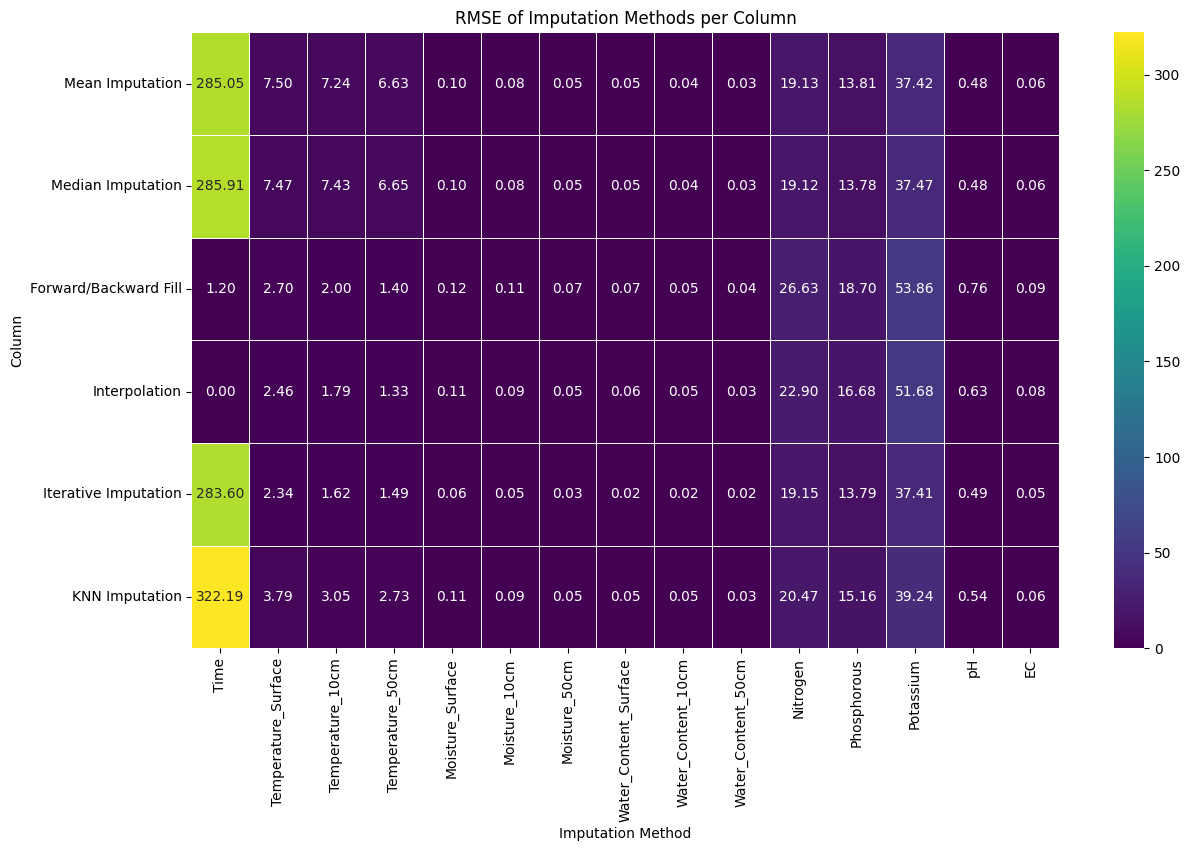


Performance Comparison:

Best Imputation Method per Column (based on RMSE):
Time                            Interpolation
Temperature_Surface      Iterative Imputation
Temperature_10cm         Iterative Imputation
Temperature_50cm                Interpolation
Moisture_Surface         Iterative Imputation
Moisture_10cm            Iterative Imputation
Moisture_50cm            Iterative Imputation
Water_Content_Surface    Iterative Imputation
Water_Content_10cm       Iterative Imputation
Water_Content_50cm       Iterative Imputation
Nitrogen                    Median Imputation
Phosphorous                 Median Imputation
Potassium                Iterative Imputation
pH                          Median Imputation
EC                       Iterative Imputation
dtype: object

Average RMSE per Imputation Method (across columns with missing values):
Interpolation             6.529630
Forward/Backward Fill     7.186213
Iterative Imputation     24.008894
Mean Imputation          25.177700
Media

In [8]:
# prompt: Compare the performance of the several methods to fill missing data.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Function to calculate RMSE for a column between original and imputed data
def calculate_rmse(original_col, imputed_col, original_missing_col):
  # We only want to evaluate the performance on the values that were originally missing
  # Find the indices where the original data had missing values
  missing_indices = original_missing_col.isnull()

  # If there were no missing values in this column, return NaN
  if not missing_indices.any():
      return np.nan

  # Get the original values and the imputed values for the indices that were missing
  original_values = original_col[missing_indices]
  imputed_values = imputed_col[missing_indices]

  # Calculate the Mean Squared Error and take the square root to get RMSE
  rmse = np.sqrt(mean_squared_error(original_values, imputed_values))
  return rmse

# Dictionary to store RMSE for each method and each column
rmse_results = {}

# Calculate RMSE for each column and each imputation method
imputation_methods = {
    'Mean Imputation': soil_simulated_fillna_mean,
    'Median Imputation': soil_simulated_fillna_median,
    'Forward/Backward Fill': soil_simulated_fillna_ffill,
    'Interpolation': soil_simulated_fillna_interpolation,
    'Iterative Imputation': soil_simulated_fillna_iterative,
    'KNN Imputation': soil_simulated_fillna_knn
}

for method_name, imputed_df in imputation_methods.items():
    rmse_results[method_name] = {}
    for col in soil_simulated.columns:
        # We need the original non-missing data and the original data with missing values
        rmse = calculate_rmse(soil_simulated[col], imputed_df[col], soil_simulated_missing[col])
        rmse_results[method_name][col] = rmse

# Convert the RMSE results to a DataFrame for better visualization
rmse_df = pd.DataFrame(rmse_results)

# Display the RMSE results
print("\nRMSE for each column and Imputation Method (evaluated only on originally missing values):")
print(rmse_df)

# Visualize the performance using a heatmap (optional, but helpful)
plt.figure(figsize=(14, 8))
sns.heatmap(rmse_df.T, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('RMSE of Imputation Methods per Column')
plt.xlabel('Imputation Method')
plt.ylabel('Column')
plt.show()

# Analyze and interpret the results
print("\nPerformance Comparison:")
# You can analyze the RMSE values to see which method performed best for each column
# Lower RMSE generally indicates better performance (closer to the original values)
# However, consider that RMSE only measures accuracy, not how well the method preserves relationships or distributions.

# Example: Find the best performing method for each column
best_method_per_column = rmse_df.idxmin(axis=1)
print("\nBest Imputation Method per Column (based on RMSE):")
print(best_method_per_column)

# Example: Calculate the average RMSE across all columns for each method (excluding columns with no missing values)
average_rmse_per_method = rmse_df.mean()
print("\nAverage RMSE per Imputation Method (across columns with missing values):")
print(average_rmse_per_method.sort_values())

# Conclusion based on analysis:
# - Simple methods (Mean/Median) might have higher RMSE compared to more complex methods.
# - Time-series methods (ffill/bfill/Interpolation) might perform well on time-dependent features.
# - Iterative and KNN imputers consider relationships between columns and might yield better results overall, but are more complex.
# The "best" method depends on the data characteristics and the goal of the imputation.

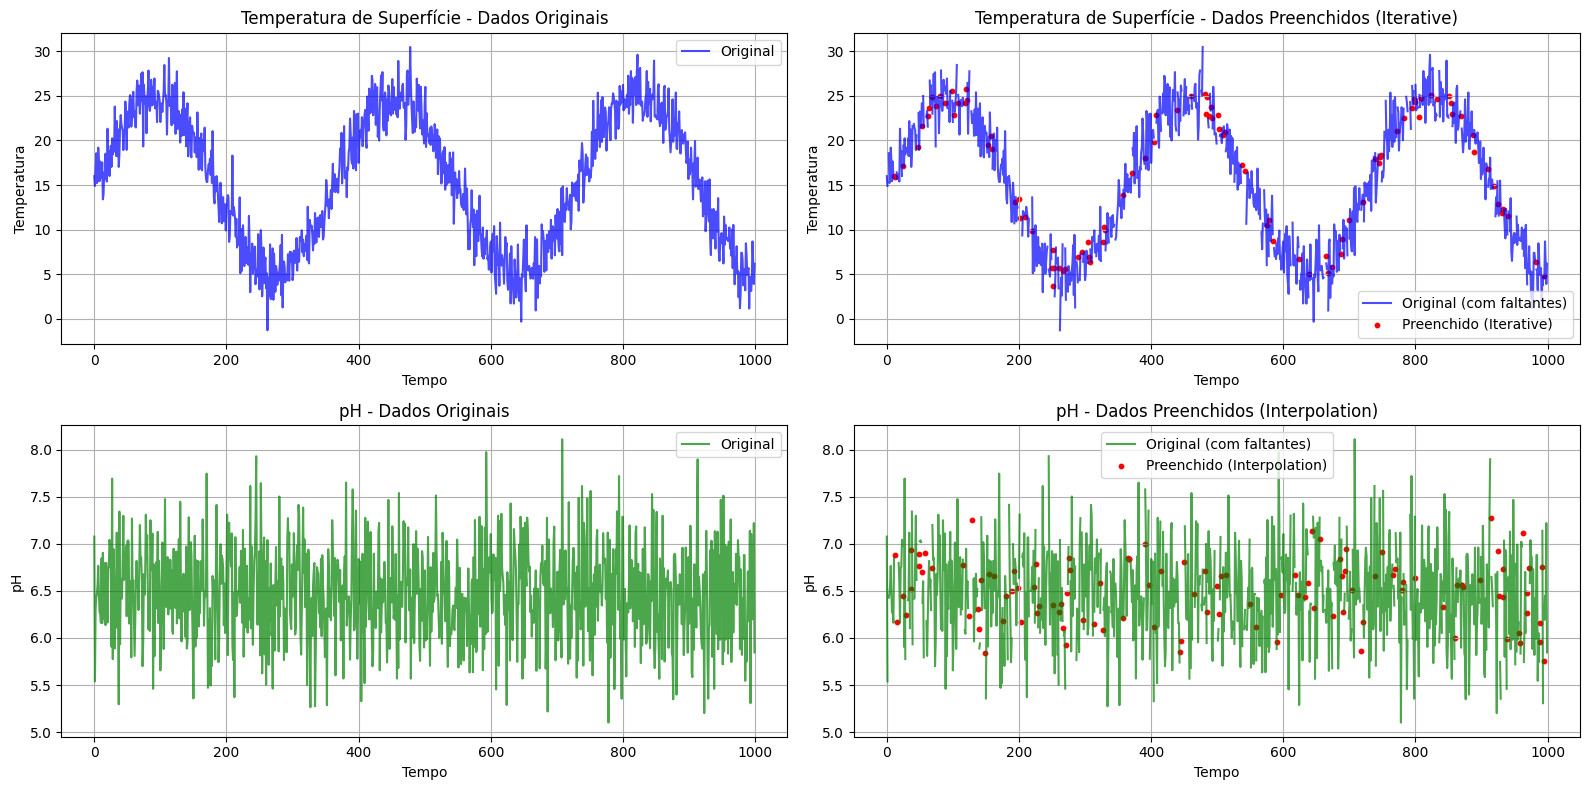

In [12]:
# prompt: Para a temperatura e para o pH, gerar um gráfico com os dados originais, e ao lado outro com os dados preenchidos, usando o método de melhor performance de cada parâmetro. Assinalar com cor vermelha os valores que foram preenchidos.

import matplotlib.pyplot as plt
# Identificar os valores que foram preenchidos
# Para 'Temperature_Surface', o melhor método pelo RMSE foi Iterative Imputation
temp_imputed_best = soil_simulated_fillna_iterative['Temperature_Surface']
temp_missing_mask = soil_simulated_missing['Temperature_Surface'].isnull() # Máscara para os valores que estavam faltando

# Para 'pH', o melhor método pelo RMSE foi Interpolation
ph_imputed_best = soil_simulated_fillna_interpolation['pH']
ph_missing_mask = soil_simulated_missing['pH'].isnull() # Máscara para os valores que estavam faltando

# Criar os gráficos
plt.figure(figsize=(16, 8))

# Gráfico para Temperature_Surface
plt.subplot(2, 2, 1)
plt.plot(soil_simulated['Time'], soil_simulated['Temperature_Surface'], label='Original', color='blue', alpha=0.7)
plt.title('Temperatura de Superfície - Dados Originais')
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(soil_simulated_missing['Time'], soil_simulated_missing['Temperature_Surface'], label='Original (com faltantes)', color='blue', alpha=0.7)
plt.scatter(soil_simulated_missing['Time'][temp_missing_mask], temp_imputed_best[temp_missing_mask], color='red', label='Preenchido (Iterative)', s=10)
plt.title('Temperatura de Superfície - Dados Preenchidos (Iterative)')
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)


# Gráfico para pH
plt.subplot(2, 2, 3)
plt.plot(soil_simulated['Time'], soil_simulated['pH'], label='Original', color='green', alpha=0.7)
plt.title('pH - Dados Originais')
plt.xlabel('Tempo')
plt.ylabel('pH')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(soil_simulated_missing['Time'], soil_simulated_missing['pH'], label='Original (com faltantes)', color='green', alpha=0.7)
plt.scatter(soil_simulated_missing['Time'][ph_missing_mask], ph_imputed_best[ph_missing_mask], color='red', label='Preenchido (Interpolation)', s=10)
plt.title('pH - Dados Preenchidos (Interpolation)')
plt.xlabel('Tempo')
plt.ylabel('pH')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Q. Gerar os mesmos gráficos para a variável `Temperature_50cm`.

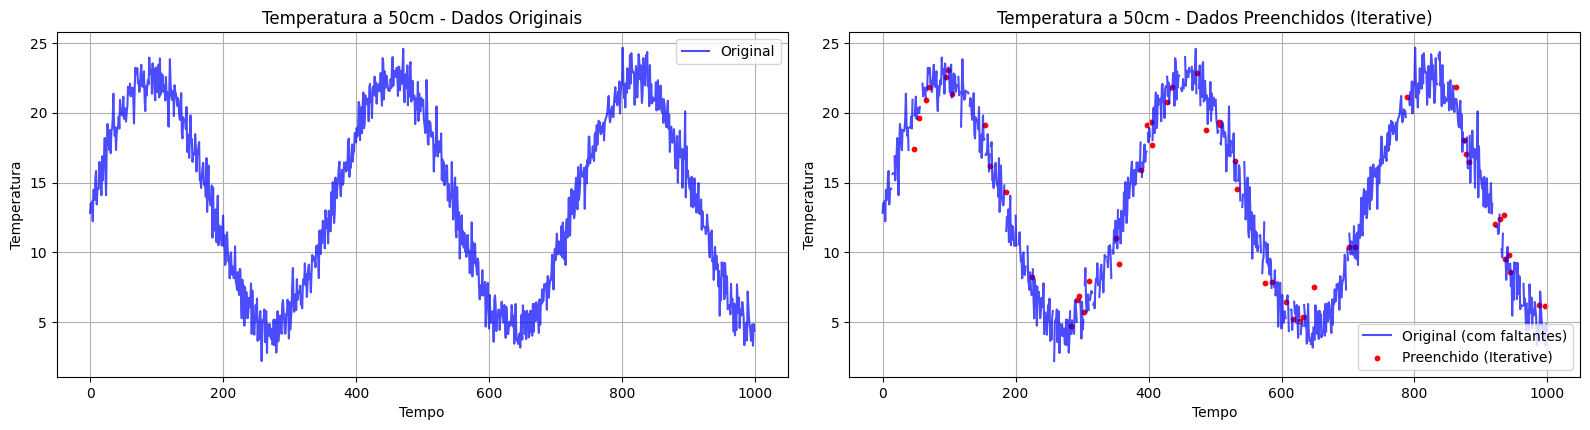

In [10]:
# prompt: Para a temperatura e para o pH, gerar um gráfico com os dados originais, e ao lado outro com os dados preenchidos, usando o método de melhor performance de cada parâmetro. Assinalar com cor vermelha os valores que foram preenchidos.

import matplotlib.pyplot as plt
# Identificar os valores que foram preenchidos
# Para 'Temperature_50cm', o melhor método pelo RMSE foi Iterative Imputation
temp_imputed_best = soil_simulated_fillna_iterative['Temperature_50cm']
temp_missing_mask = soil_simulated_missing['Temperature_50cm'].isnull() # Máscara para os valores que estavam faltando

# Para 'pH', o melhor método pelo RMSE foi Interpolation
ph_imputed_best = soil_simulated_fillna_interpolation['pH']
ph_missing_mask = soil_simulated_missing['pH'].isnull() # Máscara para os valores que estavam faltando

# Criar os gráficos
plt.figure(figsize=(16, 8))

# Gráfico para Temperature_50cm
plt.subplot(2, 2, 1)
plt.plot(soil_simulated['Time'], soil_simulated['Temperature_50cm'], label='Original', color='blue', alpha=0.7)
plt.title('Temperatura a 50cm - Dados Originais')
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(soil_simulated_missing['Time'], soil_simulated_missing['Temperature_50cm'], label='Original (com faltantes)', color='blue', alpha=0.7)
plt.scatter(soil_simulated_missing['Time'][temp_missing_mask], temp_imputed_best[temp_missing_mask], color='red', label='Preenchido (Iterative)', s=10)
plt.title('Temperatura a 50cm - Dados Preenchidos (Iterative)')
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
# prompt: Gravar o dataset dos dados simulados inicialmente no disco local, para usar noutro colab. Explicar como abrir esse dataset no outro colab.

# Salvar o DataFrame simulado com missing data em um arquivo CSV
# Usaremos o DataFrame 'soil_simulated_missing' que contém os valores NaN.
# Nome do arquivo para salvar
file_path = 'soil_simulated.csv'

# Salvar o DataFrame em CSV no diretório atual do Colab
soil_simulated.to_csv(file_path, index=False)

print(f"Dataset salvo em: {file_path}")

# Para baixar o arquivo para o seu disco local (opcional, mas útil para outro Colab)
from google.colab import files
files.download(file_path)

# Explicação de como abrir o dataset em outro Colab:

# 1. Fazer Upload do arquivo CSV para o novo Colab:
#    - No painel à esquerda, clique no ícone da pasta (Files).
#    - Clique no ícone "Upload to session storage" (uma seta para cima).
#    - Selecione o arquivo `soil_simulated_missing.csv` que você baixou.
#    - Alternativamente, se você salvou no Google Drive, pode montar o Drive
#      (ver passo 2b abaixo) e acessar o arquivo diretamente.

# 2. Carregar o dataset no novo Colab usando pandas:
#    a) Se você fez upload para o armazenamento da sessão:
#       Basta usar o caminho do arquivo.
#

Dataset salvo em: soil_simulated.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>